In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = {}
for f in os.listdir('data'):
    data[f.split('.')[0]] = pd.read_csv('data/' + f)

In [31]:
metadata = pd.read_excel('Dysgraphia-detection-through-machine-learning/data2_SciRep_pub.xlsx', 
    engine='openpyxl', usecols=lambda x: 'Unnamed' not in x)

metadata['ID'] = metadata['ID'].astype('int')
metadata['age'] = metadata['age'].astype('int')
metadata['ID_string'] = metadata['ID'].apply(lambda x: 'user' + str(x).zfill(5))
metadata['target'] = metadata['diag'].replace({'DYSGR': 1}).astype('int')
metadata.head(10)

,ID,diag,sex,hand,age,ID_string,target
0,6,DYSGR,F,R,15,user00006,1
1,7,DYSGR,M,R,15,user00007,1
2,8,DYSGR,M,R,14,user00008,1
3,11,DYSGR,M,R,8,user00011,1
4,13,DYSGR,M,R,14,user00013,1
5,14,DYSGR,M,R,10,user00014,1
6,15,DYSGR,M,R,9,user00015,1
7,16,DYSGR,M,R,9,user00016,1
8,17,DYSGR,F,R,14,user00017,1
9,19,DYSGR,F,R,15,user00019,1


In [62]:
def normalize(d):
    return (d - np.min(d)) / (np.max(d) - np.min(d))

x, y = [], []

for k, v in data.items():
    label = metadata[metadata['ID_string'] == k]['target'].values[0]
    v = v[v['on_surface'] == 1]
    arr = v[['x', 'y']].to_numpy()
    new_arr = np.zeros(arr.shape)
    new_arr[:, 0] = normalize(arr[:, 0])
    new_arr[:, 1] = normalize(arr[:, 1])
    
    x.append(new_arr)
    y.append(label)

Text(0.5, 1.0, 'Sample 1, diagnose: no')

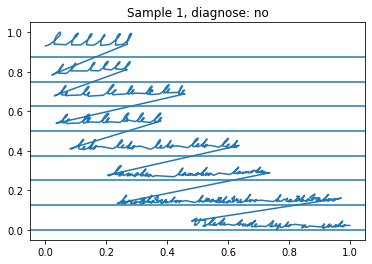

In [64]:
plt.plot(x[0][:, 0], x[0][:, 1])

for i in range(8):
    plt.axhline(i*0.125)

plt.title(f'Sample 1, diagnose: {"dysgraphia" if y[0] == 1 else "no" }')

## Cut image in 8 slices

In [38]:
def cut(arr):
    cutting = arr[:, 1] * 8
    cutting = cutting - 0.0001
    cutting = np.trunc(cutting)
    cuts = [[] for _ in range(8) ]

    for i, cut in enumerate(cutting):
        cuts[int(cut)].append(arr[i, :])

    cuts = [np.vstack(cut) for cut in cuts]
    cuts = reversed(cuts)
    new_cuts = []
    for i, c in enumerate(cuts):
        new_c = np.zeros(c.shape)
        new_c[:, 1] = c[:, 1] + (i/8)
        new_c[:, 0] = c[:, 0] + (i)
        new_cuts.append(new_c)
        
    return new_cuts

def mix(data):
    xs, y = data
    
    return [(x, y) for x in xs]
    
cutted_x = [cut(i) for i in x]
data = list(map(mix, zip(cutted_x, y)))
data = [j for i in data for j in i]

Text(0.5, 1.0, 'Writing letter "l"')

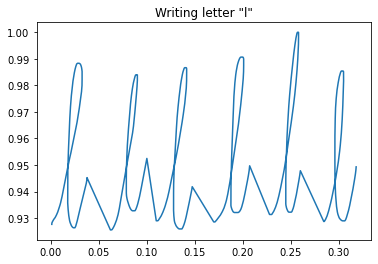

In [41]:
plt.plot(data[0][0][:, 0], data[0][0][:, 1])
plt.title('Writing letter "l"')